# English Prescribing Dataset - July 2024

## Introduction

The notebook below details analyses performed on the July 2024 English prescribing dataset, available on the NHS Open Data Portal. This dataset contains detailed information on prescriptions issued in England, Wales, Scotland, Guernsey, Alderney, 
Jersey, and the Isle of Man. It is updated monthly and is an extremely large dataset; the July 2024 dataset has over 18 million entries.

We begin by loading the necessary Python libraries and importing the data.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
ep = pandas.read_csv(r"C:\Users\adamb\Downloads\EPD_202407.csv")

### Overall July 2024 spending on prescriptions

Overall spending on prescriptions in July 2024 came to £907 million. A histogram of overall spending is depicted below. 

The ACTUAL_COST variable was log-transformed due to extreme outliers.

In [118]:
os = ep['ACTUAL_COST'].sum().round()
overall_spend = "{:,.1f}".format(os)
overall_spend 

'906,725,094.00'

(array([1.8317156e+07, 3.2390000e+03, 3.4500000e+02, 7.6000000e+01,
        2.8000000e+01, 1.0000000e+01, 1.0000000e+00, 5.0000000e+00,
        1.0000000e+00, 1.0000000e+00]),
 array([    0.      ,  4878.996118,  9757.992236, 14636.988354,
        19515.984472, 24394.98059 , 29273.976708, 34152.972826,
        39031.968944, 43910.965062, 48789.96118 ]),
 <BarContainer object of 10 artists>)

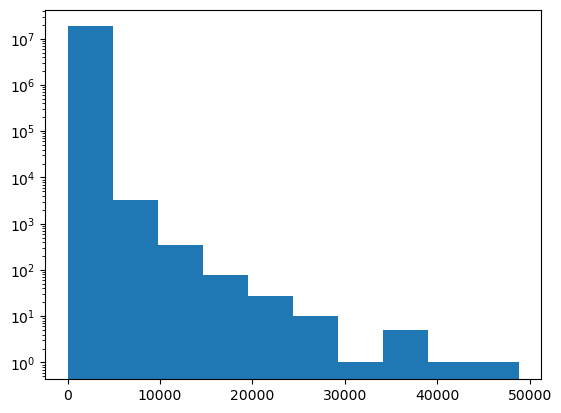

In [154]:
plt.hist(ep['ACTUAL_COST'], log = True)

### Spending by therapy area

Below is spending by therapy area. The figures are divided by 1e6, and represent millions in GBP. 
This data is then represented in a bar chart. 

In [17]:
pandas.options.display.float_format = '{:,.1f}'.format
therapy_area = ep.groupby(['BNF_CHAPTER_PLUS_CODE'])['ACTUAL_COST'].sum().sort_values(ascending=False).round()/1e6
therapy_area

BNF_CHAPTER_PLUS_CODE
06: Endocrine System                                      169.4
04: Central Nervous System                                139.1
02: Cardiovascular System                                 122.8
03: Respiratory System                                    101.3
09: Nutrition and Blood                                    73.4
21: Appliances                                             66.2
01: Gastro-Intestinal System                               61.5
23: Stoma Appliances                                       35.1
13: Skin                                                   25.7
07: Obstetrics, Gynaecology and Urinary-Tract Disorders    21.7
05: Infections                                             18.5
20: Dressings                                              14.2
08: Malignant Disease and Immunosuppression                14.1
11: Eye                                                    13.6
10: Musculoskeletal and Joint Diseases                     10.9
12: Ear, Nose and 

### Spending by treatment 

Here we present data showing spending by treatment. We present only the top 10 treatments in terms of spend. As above, figures are in £ millions.

In [19]:
therapy = ep.groupby(['CHEMICAL_SUBSTANCE_BNF_DESCR'])['ACTUAL_COST'].sum().sort_values(ascending=False).round()/1e6
therapy = therapy.to_frame()
therapy.head(10)

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Beclometasone dipropionate,27.1
Dapagliflozin,25.9
Detection Sensor Interstitial Fluid/Gluc,23.9
Edoxaban,20.2
Rivaroxaban,18.8
Catheters,15.7
Empagliflozin,13.7
Semaglutide,13.3
Beclometdiprop/formoterol/glycopyrronium,13.3


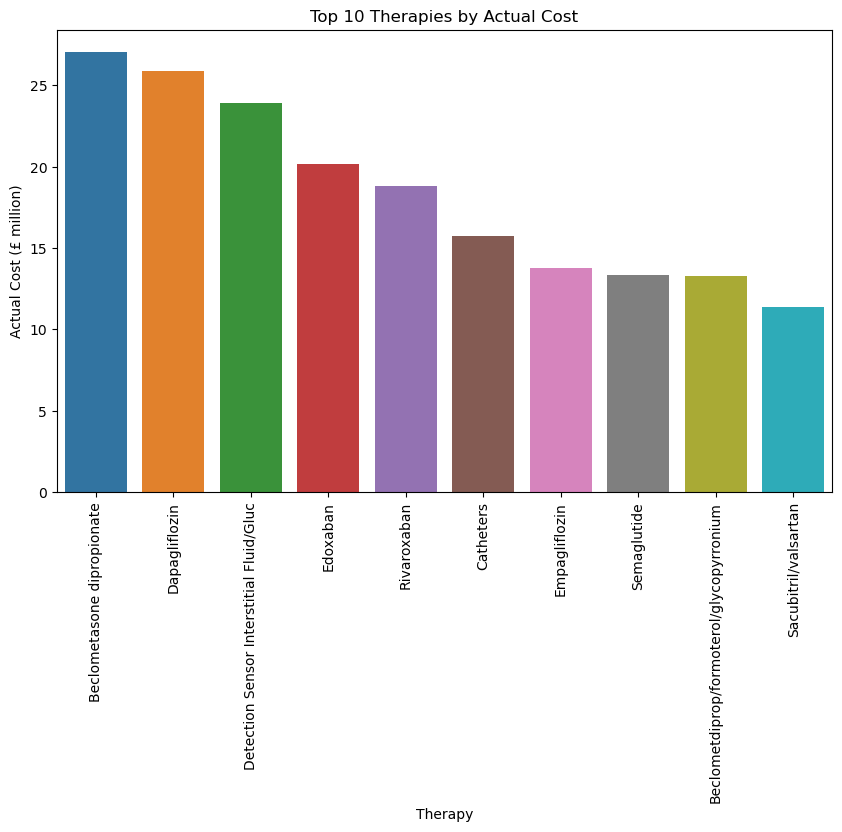

In [27]:
top_10_therapies = therapy.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_therapies.index, y=top_10_therapies['ACTUAL_COST'], hue=top_10_therapies.index, dodge=False)
plt.legend([],[], frameon=False)
plt.xlabel('Therapy')
plt.ylabel('Actual Cost (£ million)')
plt.title('Top 10 Therapies by Actual Cost')
plt.xticks(rotation=90)  
plt.show()

### Spending by region

In a similar format to the above, the data below shows spending by region. If South East and London are summed together, then this broader SE region
accounts for largest proportion of overall spending.

The data is then depicted in a boxplot, with a log transformation of the Actual_Cost variable. 
Of note, is that there does not appear to be significant variation in terms of spending across the region (with the caveat that this is log-transformed data).

In [136]:
region = ep.groupby(['REGIONAL_OFFICE_NAME'])['ACTUAL_COST'].sum().sort_values(ascending=False).round()/1e6
region = region.to_frame()
region

,ACTUAL_COST
REGIONAL_OFFICE_NAME,
MIDLANDS,183.3
NORTH EAST AND YORKSHIRE,151.2
SOUTH EAST,138.9
NORTH WEST,127.6
LONDON,111.9
EAST OF ENGLAND,104.0
SOUTH WEST,89.3
UNIDENTIFIED,0.4


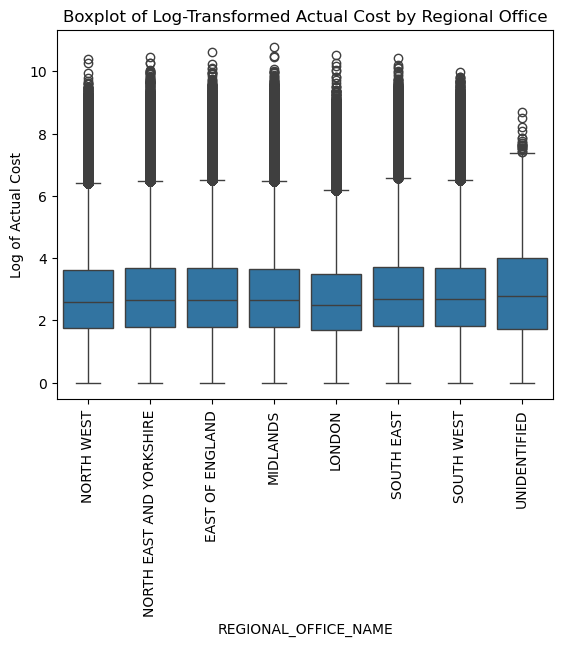

In [162]:
ep['LOG_ACTUAL_COST'] = numpy.log1p(ep['ACTUAL_COST'])
sns.boxplot(x='REGIONAL_OFFICE_NAME', y='LOG_ACTUAL_COST', data=ep)
plt.xticks(rotation=90)
plt.title('Boxplot of Log-Transformed Actual Cost by Regional Office')
plt.ylabel('Log of Actual Cost')
plt.show()